# Lending-Club Case Study: Assignment

# Business Understanding

A consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

# Business Objective

The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

In [1]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loan_df =  pd.read_csv('loan.csv', low_memory=False)
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### As we can see from the above dataframe, there are lots of null, missing values

We have to find out the percentage of missing values, and later clean the data

# Data Cleaning

In [3]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# Shape of the dataframe
loan_df.shape

(39717, 111)

In [5]:
#Searching for Missing values,type of data and also known the shape of data
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [7]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [8]:
# Total percentage of null values in the given dataset
nan_percent = loan_df.isnull().sum()*100/len(loan_df)
nan_percent[nan_percent > 0]

emp_title                       6.191303
emp_length                      2.706650
desc                           32.580507
title                           0.027696
mths_since_last_delinq         64.662487
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 68, dtype: float64

In [9]:
#Removing columns which has more than 20% null values in it.
loan_df.drop(nan_percent[ nan_percent > 20 ].index, axis=1, inplace=True)

In [10]:
loan_df.shape

(39717, 53)

### Now we can see that all null values which are greater than 20% are dropped and we have 53 columns isntaed of 111 columns.

Let's clean more of the unique data still present.

In [11]:
#Finding number of unique values in each column
loan_df.nunique().sort_values().head(57)

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

### As we see from the above from 'tax_liens' to  'pymnt_plan' there are only single unique values

We don't require such data, and will drop those columns.

#### 'emp_title', 'title', 'url', and 'member_id' columns have text values, that are unique.

Dropping those colums.


In [12]:
# Dropping all the unrequired data
loan_df.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan', 'emp_title', 'title', 'url', 'member_id' ], axis=1, inplace=True)


### We only want to work with the data where our interests lie. We are only interested only in loan application details, so data related with people who already took loan and charged off loans are od no use for the analysis part

Now, we will drop all such columns which is not related with loan applications. We can promt such suggestions from the 'data_dictionary'file that we have.

In [13]:
# Dropping the useless data
loan_df.drop(['total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', 'last_credit_pull_d', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'out_prncp', 'out_prncp_inv'], axis=1, inplace=True)

In [14]:
# Let's find if still any null values present
nan_percent = loan_df.isnull().sum()*100/len(loan_df)
nan_percent

id                      0.000000
loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.706650
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
delinq_2yrs             0.000000
earliest_cr_line        0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.125891
total_acc               0.000000
total_pymnt             0.000000
total_pymnt_inv         0.000000
last_pymnt_amnt         0.000000
pub_rec_ba

In [15]:
# dropping the columns with null values
loan_df.drop(['emp_length', 'revol_util', 'pub_rec_bankruptcies'], axis=1, inplace=True)

In [16]:
loan_df.shape

(39717, 28)

In [17]:
# Let's find if still any null values present
nan_percent = loan_df.isnull().sum()*100/len(loan_df)
nan_percent

id                     0.0
loan_amnt              0.0
funded_amnt            0.0
funded_amnt_inv        0.0
term                   0.0
int_rate               0.0
installment            0.0
grade                  0.0
sub_grade              0.0
home_ownership         0.0
annual_inc             0.0
verification_status    0.0
issue_d                0.0
loan_status            0.0
purpose                0.0
zip_code               0.0
addr_state             0.0
dti                    0.0
delinq_2yrs            0.0
earliest_cr_line       0.0
inq_last_6mths         0.0
open_acc               0.0
pub_rec                0.0
revol_bal              0.0
total_acc              0.0
total_pymnt            0.0
total_pymnt_inv        0.0
last_pymnt_amnt        0.0
dtype: float64

### Now we can see that all null values are dropped and we are left with 28 columns to work with.

In [18]:
loan_df.head(10)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,...,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,RENT,...,0,Jan-85,1,3,0,13648,9,5863.155187,5833.84,171.62
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,RENT,...,0,Apr-99,5,3,0,1687,4,1008.710000,1008.71,119.66
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,RENT,...,0,Nov-01,2,2,0,2956,10,3005.666844,3005.67,649.91
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,RENT,...,0,Feb-96,1,10,0,5598,37,12231.890000,12231.89,357.48
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,RENT,...,0,Jan-96,0,15,0,27783,38,3513.330000,3513.33,67.79
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,RENT,...,0,Nov-04,3,9,0,7963,12,5632.210000,5632.21,161.03
6,1069639,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,RENT,...,0,Jul-05,1,7,0,17726,11,10110.840000,10110.84,1313.76
7,1072053,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,RENT,...,0,Jan-07,2,4,0,8221,4,3939.135294,3939.14,111.34
8,1071795,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,OWN,...,0,Apr-04,2,11,0,5210,13,646.020000,646.02,152.39
9,1071570,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,RENT,...,0,Sep-04,0,2,0,9279,3,1476.190000,1469.34,121.45


## We want to work the data where 'loan_status' is Fullu Paid and Charged Off. 

In [19]:
#Removing loan status, where loan_status == Current rows
loan_df = loan_df[loan_df.loan_status != 'Current']

In [20]:
loan_df.shape

(38577, 28)

## Now we have an overall data of 38577 rows and 28 columns

In [21]:
loan_df.dtypes

id                       int64
loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                    object
int_rate                object
installment            float64
grade                   object
sub_grade               object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
zip_code                object
addr_state              object
dti                    float64
delinq_2yrs              int64
earliest_cr_line        object
inq_last_6mths           int64
open_acc                 int64
pub_rec                  int64
revol_bal                int64
total_acc                int64
total_pymnt            float64
total_pymnt_inv        float64
last_pymnt_amnt        float64
dtype: object

In [23]:
loan_df.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt
count,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000
mean,6.763787e+05,11047.025430,10784.058506,10222.481123,322.466318,6.877797e+04,13.272727,0.146668,0.871737,9.275423,0.055422,13289.489826,22.052648,11866.970365,11271.196153,2746.243218
std,2.092639e+05,7348.441646,7090.306027,7022.720644,208.639215,6.421868e+04,6.673044,0.492271,1.071546,4.401588,0.237804,15866.492241,11.425861,8809.856227,8700.845592,4494.648131
min,5.473400e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,5.120330e+05,5300.000000,5200.000000,5000.000000,165.740000,4.000000e+04,8.130000,0.000000,0.000000,6.000000,0.000000,3650.000000,13.000000,5513.497338,5019.590000,217.420000
50%,6.564230e+05,9600.000000,9550.000000,8733.440000,277.860000,5.886800e+04,13.370000,0.000000,1.000000,9.000000,0.000000,8762.000000,20.000000,9674.048405,9066.660000,568.260000
75%,8.291460e+05,15000.000000,15000.000000,14000.000000,425.550000,8.200000e+04,18.560000,0.000000,1.000000,12.000000,0.000000,16912.000000,29.000000,16136.952430,15329.780000,3447.250000
max,1.077501e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,58563.679930,58563.680000,36115.200000


In [24]:
loan_df.corr()

,id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt
id,1.000000,0.120614,0.131283,0.231603,0.076088,0.005572,0.091785,-0.008417,-0.041021,0.016256,-0.017683,0.001357,0.039902,0.110432,0.194832,0.142251
loan_amnt,0.120614,1.000000,0.981790,0.937922,0.932260,0.268999,0.062436,-0.031951,0.012940,0.177200,-0.049997,0.314022,0.256179,0.881910,0.847635,0.474614
funded_amnt,0.131283,0.981790,1.000000,0.956172,0.958035,0.264798,0.062194,-0.031866,0.012857,0.175682,-0.050576,0.306501,0.250551,0.898709,0.864501,0.478448
funded_amnt_inv,0.231603,0.937922,0.956172,1.000000,0.905464,0.251981,0.070663,-0.038171,-0.002800,0.162738,-0.051470,0.286265,0.242715,0.874730,0.909127,0.469166
installment,0.076088,0.932260,0.958035,0.905464,1.000000,0.267842,0.052038,-0.019755,0.011014,0.172893,-0.045706,0.309501,0.229860,0.858493,0.817665,0.413588
annual_inc,0.005572,0.268999,0.264798,0.251981,0.267842,1.000000,-0.121530,0.022229,0.035465,0.156927,-0.017864,0.277374,0.234534,0.256313,0.245198,0.143242
dti,0.091785,0.062436,0.062194,0.070663,0.052038,-0.121530,1.000000,-0.033347,0.002178,0.287849,-0.004742,0.228090,0.229119,0.059274,0.066277,0.008566
delinq_2yrs,-0.008417,-0.031951,-0.031866,-0.038171,-0.019755,0.022229,-0.033347,1.000000,0.008733,0.011649,0.007623,-0.054437,0.066994,-0.023130,-0.029608,-0.012511
inq_last_6mths,-0.041021,0.012940,0.012857,-0.002800,0.011014,0.035465,0.002178,0.008733,1.000000,0.093434,0.023726,-0.020787,0.113516,-0.008244,-0.018589,0.027772
open_acc,0.016256,0.177200,0.175682,0.162738,0.172893,0.156927,0.287849,0.011649,0.093434,1.000000,0.000028,0.288055,0.687260,0.162141,0.152008,0.082396


In [46]:
#stripping '%' value
loan_df['int_rate'] = loan_df.int_rate.str.strip('%').astype(float)

C:\Users\HP\AppData\Local\Temp/ipykernel_17160/1013524910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df['int_rate'] = loan_df.int_rate.str.strip('%').astype(float)


In [62]:
#Stripping empty space in values in term
loan_df.loc['term'] = loan_df.term.str.strip()
loan_df.term.unique()

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


array([' 36 months', ' 60 months', nan], dtype=object)

In [ ]:
loan_df.head(10)

In [ ]:
loan_df.shape

In [ ]:
loan_df.dtypes

## Now our dataset is ready to perform analysis on it

-> Let's begin with univariate Anlysis for every variable

# Univariate Analysis

### Loan Amount (loan_amnt)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


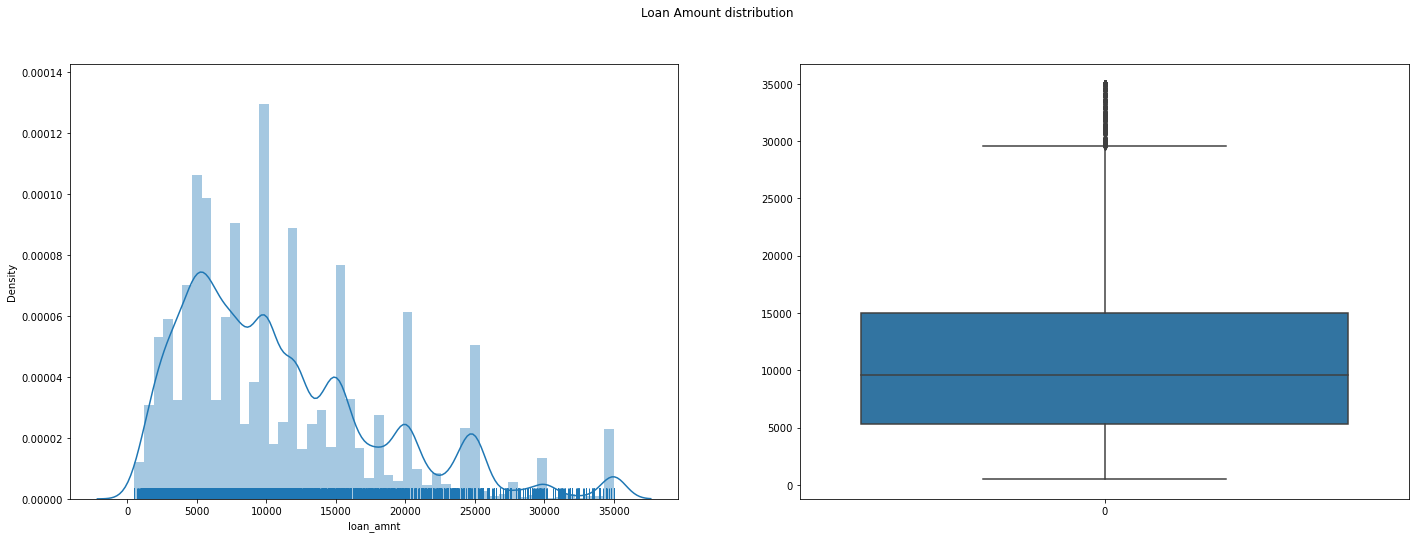

In [38]:
#Increasing the figure size of plot
plt.figure(figsize=(24,8))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.distplot(a=loan_df.loan_amnt, rug=True)
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=loan_df.loan_amnt)
#Single title for both subplots.
# title for plots
plt.suptitle('Loan Amount distribution')
plt.show()

In [39]:
#Stats of laon amount
loan_df.loan_amnt.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
90%      21600.000000
95%      25000.000000
99%      35000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

## Observations

Majority of the people took loan of 10000, as we can see clearly in the plot. Very less member took loan greater than 30000

###  Funded Amount(funded_amnt)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


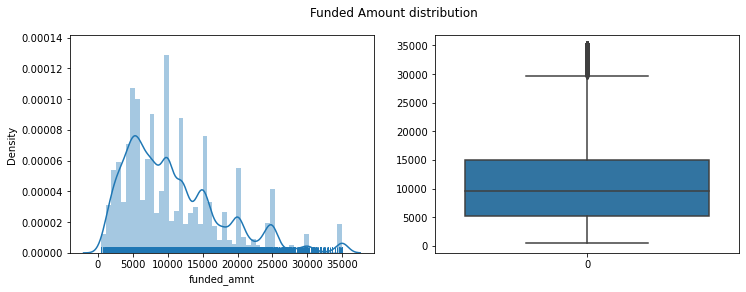

In [37]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=loan_df.funded_amnt, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=loan_df.funded_amnt)
plt.suptitle('Funded Amount distribution')
plt.show()

In [40]:
loan_df.funded_amnt.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    38577.000000
mean     10784.058506
std       7090.306027
min        500.000000
25%       5200.000000
50%       9550.000000
75%      15000.000000
90%      20000.000000
95%      25000.000000
99%      35000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

## Observations

The above plot tells us that Lending club approved most of Applied loan amount.

## funded_amnt_inv


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


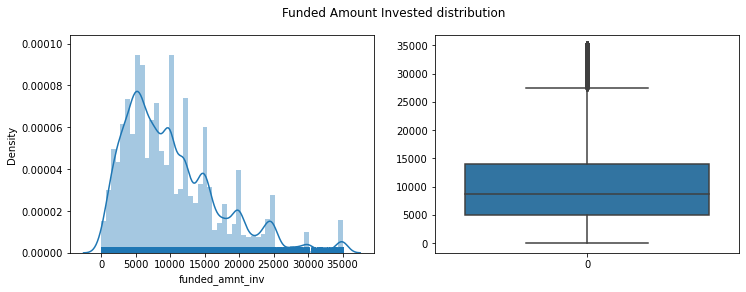

In [41]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=loan_df.funded_amnt_inv, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=loan_df.funded_amnt_inv)
plt.suptitle('Funded Amount Invested distribution')
plt.show()

In [42]:
loan_df.funded_amnt_inv.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    38577.000000
mean     10222.481123
std       7022.720644
min          0.000000
25%       5000.000000
50%       8733.440000
75%      14000.000000
90%      19975.000000
95%      24500.066590
99%      34715.012285
max      35000.000000
Name: funded_amnt_inv, dtype: float64




## int_rate

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


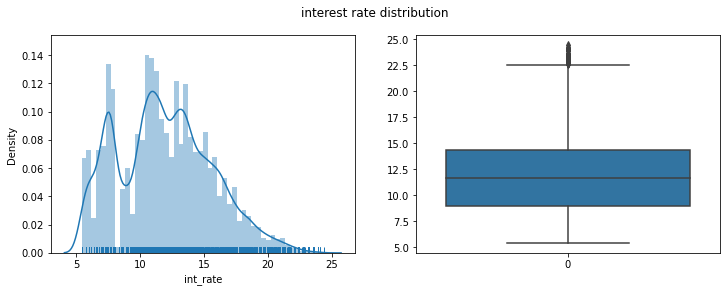

In [48]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=loan_df.int_rate, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=loan_df.int_rate)
plt.suptitle('interest rate distribution')
plt.show()

## Observations

From the above 2 plots and statistics of interest rates we can conclude that most of the interest rates lies between 9% to 14.5%. Some people took loan at higher rates of interest i.e., 22.5%

## installment

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


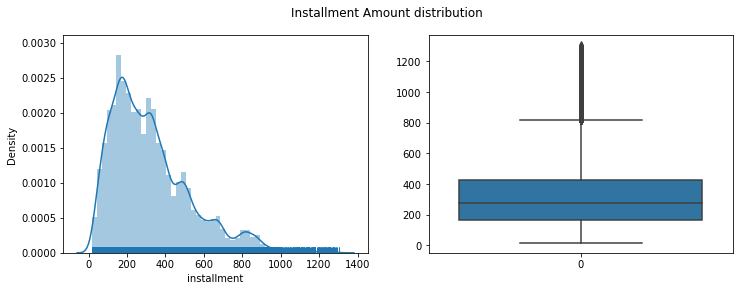

In [49]:
installment = loan_df.installment
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=installment, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=installment)
plt.suptitle('Installment Amount distribution')
plt.show()

## Observations:
The Most representative value of Installment amount in around 280.

## annual_inc

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


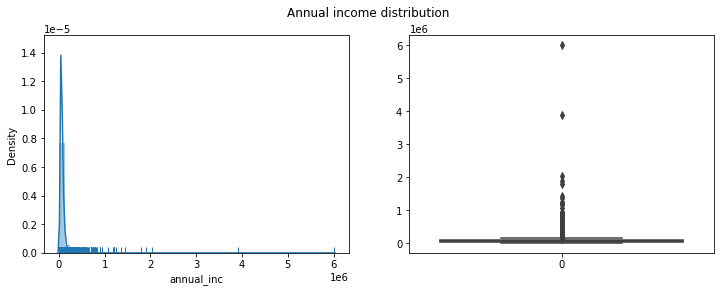

In [50]:
var = loan_df.annual_inc
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var)
plt.suptitle('Annual income distribution')
plt.show()

## Observations

Around 361 people are having more the 235000 annual income. and 99% of people are having incomes below 235000.

## dti
-> A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


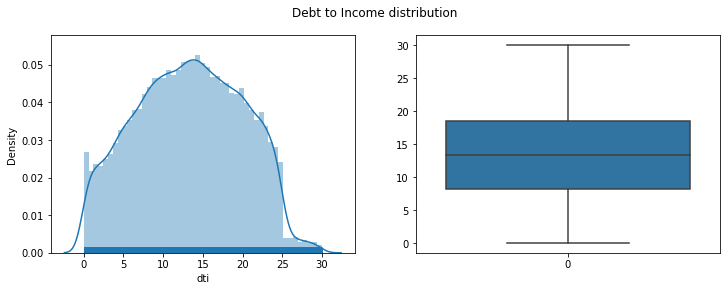

In [51]:
var1 = loan_df.dti

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var1)
plt.suptitle('Debt to Income distribution')
plt.show()

## Observations

Looks like there are no outliers and the distribution is very much similar to normal distribution. This is good sign that all the loans are given to barrower's who have Debt to Income ration less than 30.

## term

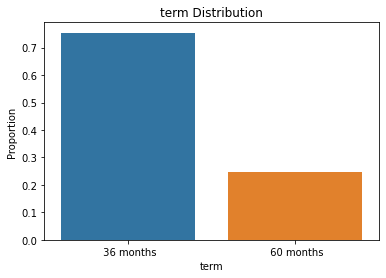

In [52]:
var = 'term'
#Probability / Percentage of each values
prob_df = loan_df[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

## Observations:
Borrowers have taken 36 months tenure more than 60 months tenure.

## loan_status

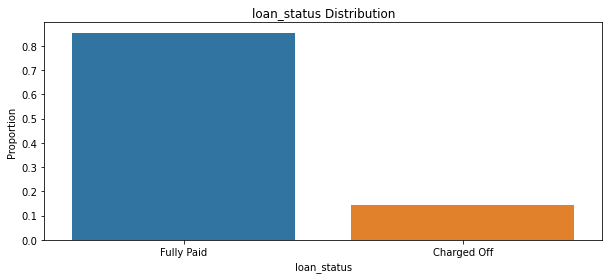

In [53]:
plt.figure(figsize=(10,4))
var = 'loan_status'
#Probability / Percentage of each values
prob_df = loan_df[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

## Observations

85% of borrowers has paid the loan fully. where are 14% are defaulted the loan.

## purpose


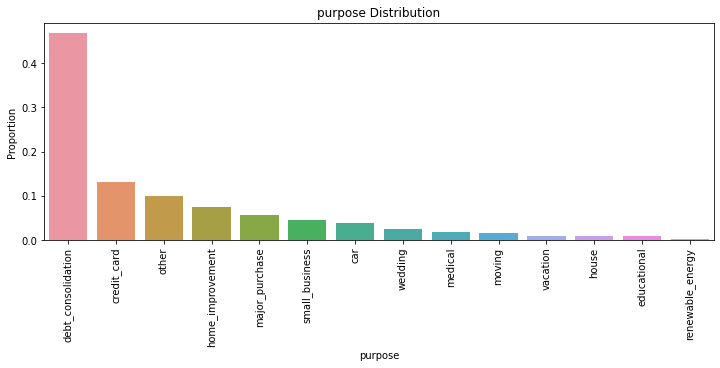

In [54]:
plt.figure(figsize=(12,4))
var = 'purpose'
#Probability / Percentage of each values
prob_df = loan_df[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.xticks(rotation=90)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

## Observations:
Looks line more number of people took loan for debt consolidation and a very few people took for renewable energy

# Bivariate Analysis

## Term vs Loan Status


C:\Users\HP\AppData\Local\Temp/ipykernel_17160/2650481917.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  df['proportion'] = df.groupby('term').transform(lambda x: x/x.sum())


Text(0.5, 1.0, 'Term vs Loan status')

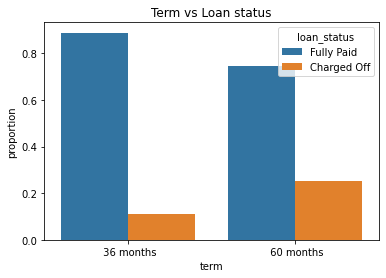

In [55]:
#Proportion of values for each category
df = loan_df.groupby(['term', 'loan_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('term').transform(lambda x: x/x.sum())
sns.barplot(x='term', y='proportion', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])

plt.title('Term vs Loan status')

## Observations:
Looks like there are more proportion of borrowers defaulted loan in 60 months term then 36 months. Also the Fully Paid rate is higher in 36 months tenure.

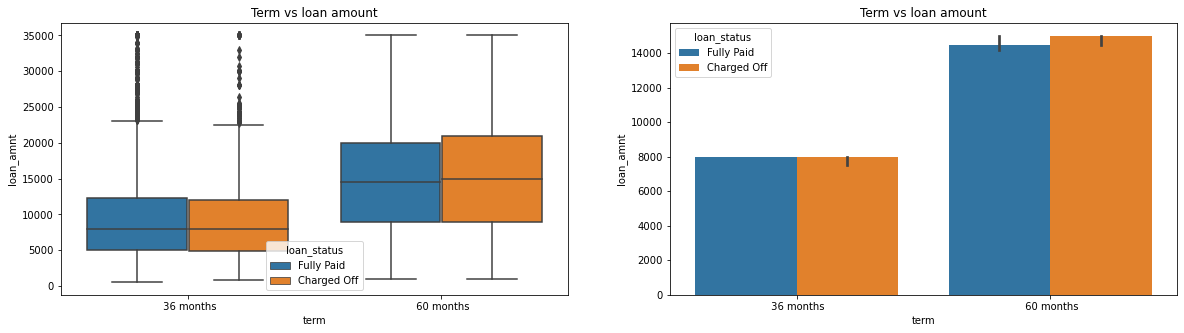

In [56]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='loan_amnt', hue='loan_status', data=loan_df)
plt.title('Term vs loan amount')
plt.subplot(122)
sns.barplot(x='term', y='loan_amnt', hue='loan_status', data=loan_df, estimator=np.median)
plt.title('Term vs loan amount')
plt.show()

## Observations:
Loan amount is not a decider for defaults in both 36 adn 60 months.
Borrowers have equal distribtion is both default and non default for 36 and 60 months tenures.

## purpose vs loan_status

<Figure size 432x288 with 0 Axes>

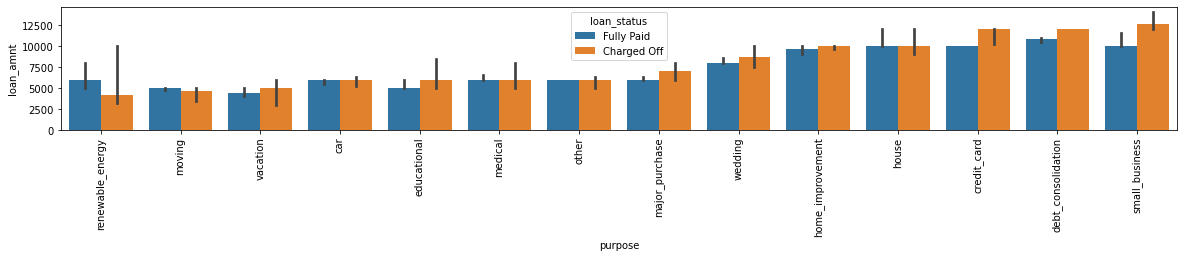

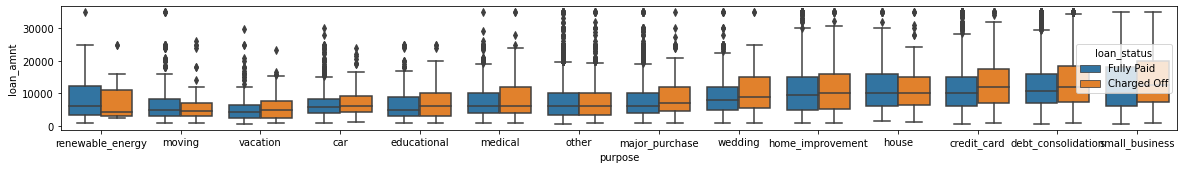

In [57]:
df = loan_df.groupby(['purpose', 'loan_status'], as_index=False)['loan_amnt'].median()

plt.suptitle('Purpose vs loan amount')
plt.figure(figsize=(20,5))
plt.subplot(211)
sns.barplot(x='purpose', y='loan_amnt', hue='loan_status', data= loan_df, order=df[df.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose, estimator=np.median)
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.subplot(212)
sns.boxplot(x='purpose', y='loan_amnt', hue='loan_status', data= loan_df, order=df[df.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose)
plt.show()

## Observations:
Small Business has more defaults when the loan amount is also high.

## loan_amnt vs int_rate

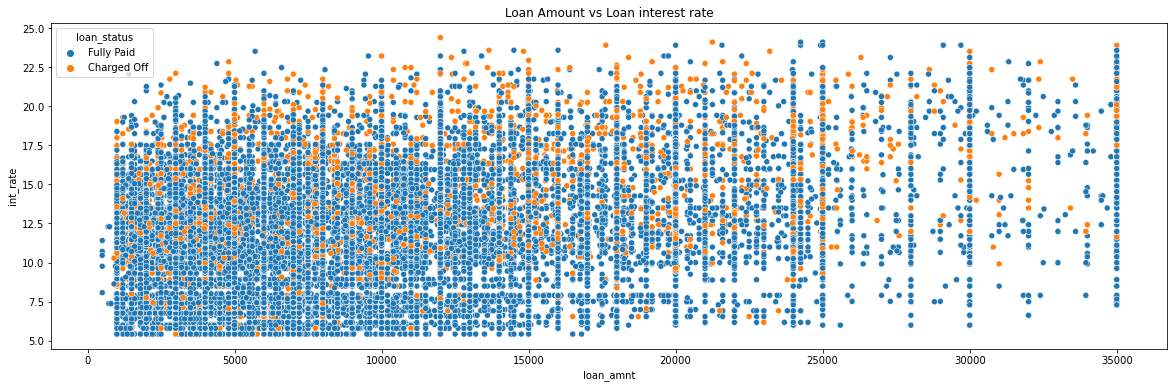

In [58]:
plt.figure(figsize=(20,6))
#scatter plot for analysing distribution
sns.scatterplot(x='loan_amnt', y='int_rate', data=loan_df, hue='loan_status')
plt.title('Loan Amount vs Loan interest rate')
plt.show()

## Observartions:
Values are pretty much spread accross all the space. There is not specific pattern found in the spread.

## Loan Amount vs Annual income

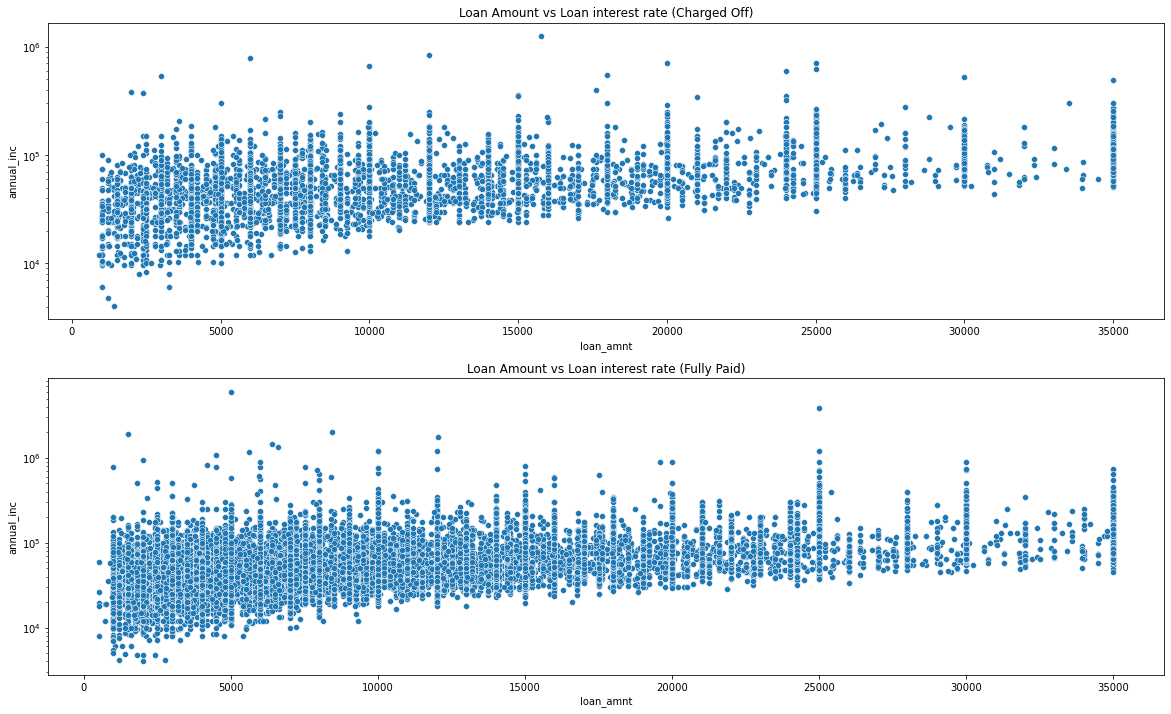

In [60]:
plt.figure(figsize=(20,12))
plt.subplot(211)
sns.scatterplot(x='loan_amnt', y='annual_inc', data=loan_df[loan_df.loan_status == 'Charged Off'])
plt.yscale('log')
plt.title('Loan Amount vs Loan interest rate (Charged Off)')
plt.subplot(212)
sns.scatterplot(x='loan_amnt', y='annual_inc', data=loan_df[loan_df.loan_status == 'Fully Paid'])
plt.yscale('log')
plt.title('Loan Amount vs Loan interest rate (Fully Paid)')
plt.show()

## Observations
Both Fully paid and Charged Off loans are having similar pattern versus Annual income. We can fit a linear patter with a line which has very much less slope.

## Correlation Matrix

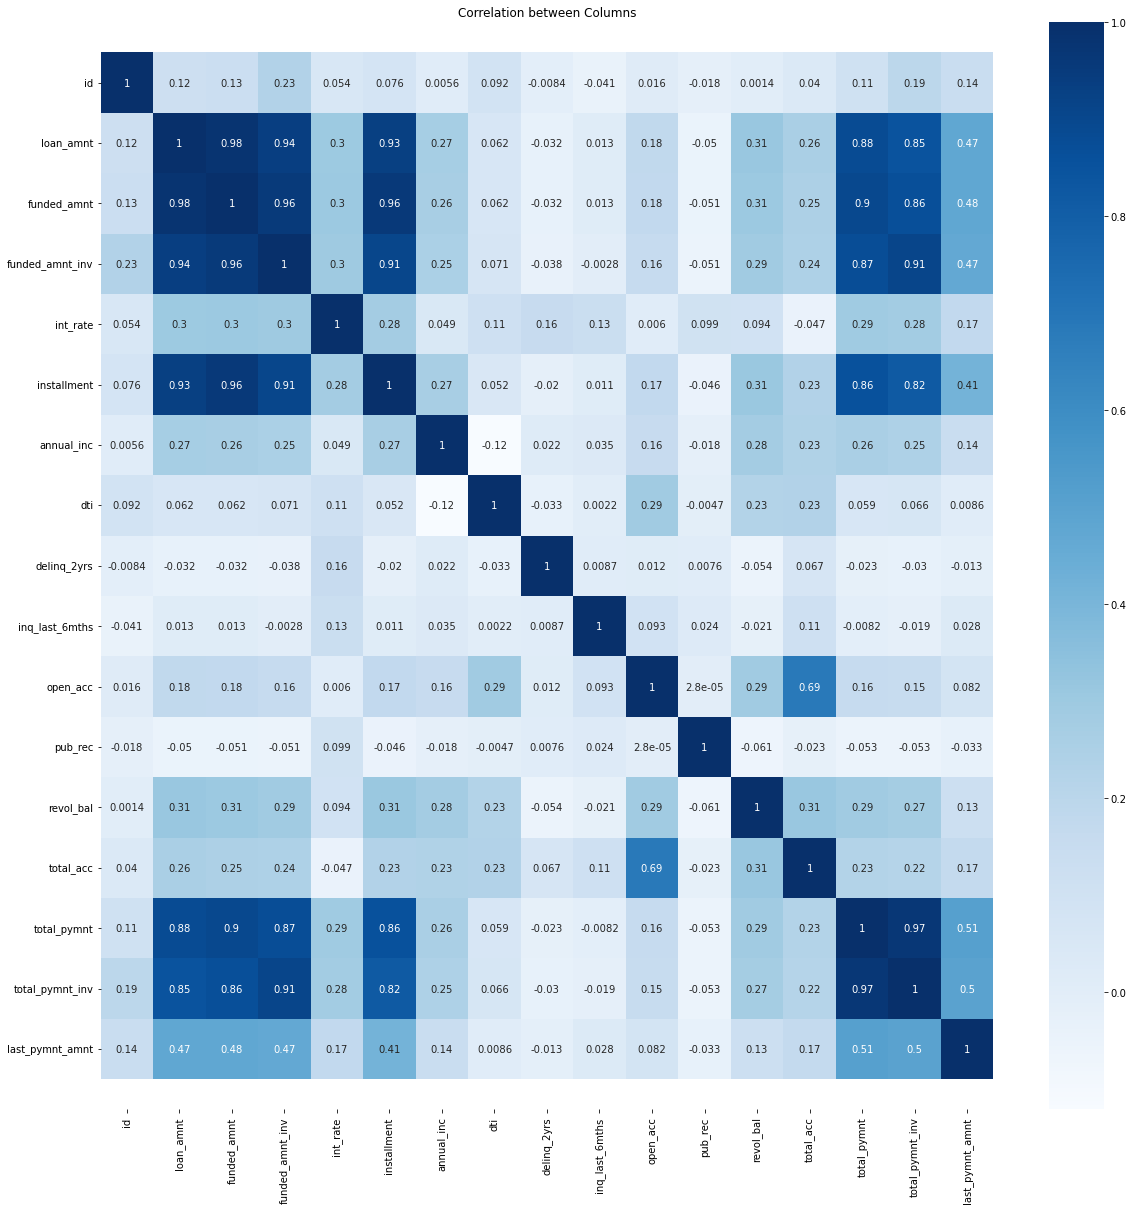

In [61]:
#Finding correlation matric
corr_matrix = loan_df.corr()
plt.figure(figsize=(20,20))
#plotting correlatioon matric on a heat map
ax = sns.heatmap(corr_matrix, annot = True, cmap='Blues')
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.title("Correlation between Columns")
plt.show()